# 1. Libraries and Packages

In [1]:
# Import general packages - numpy,pandas,seaborn,matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
#import the data set
traindata = pd.read_csv('cleaned_data.csv')
traindata.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1


# 2. Exploratory Data Analysis

## 2.1 Exploring relationship between 'sex' and 'stroke'

In [6]:
gender_counts = traindata['sex'].value_counts()
print(gender_counts)

1.0    22667
0.0    18182
Name: sex, dtype: int64


Text(0.5, 0, 'Sex')

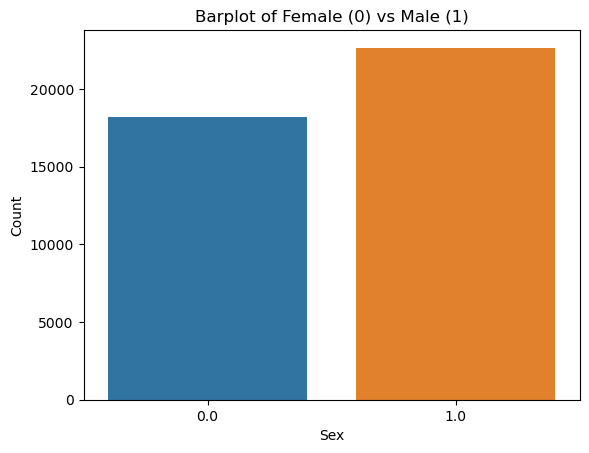

In [7]:
#Barplot to represent gender counts
sb.countplot(data=traindata,x='sex', orient='h')
plt.title("Barplot of Female (0) vs Male (1)")
plt.ylabel('Count')
plt.xlabel('Sex')

From our barplot and function value_counts(), our dataset is approximately equally split in gender, with 18182 Female and 22667 Male.

In [11]:
gender_stroke_counts = traindata.groupby(['sex', 'stroke']).size()
print(gender_stroke_counts)


sex  stroke
0.0  0          7967
     1         10215
1.0  0         12480
     1         10187
dtype: int64


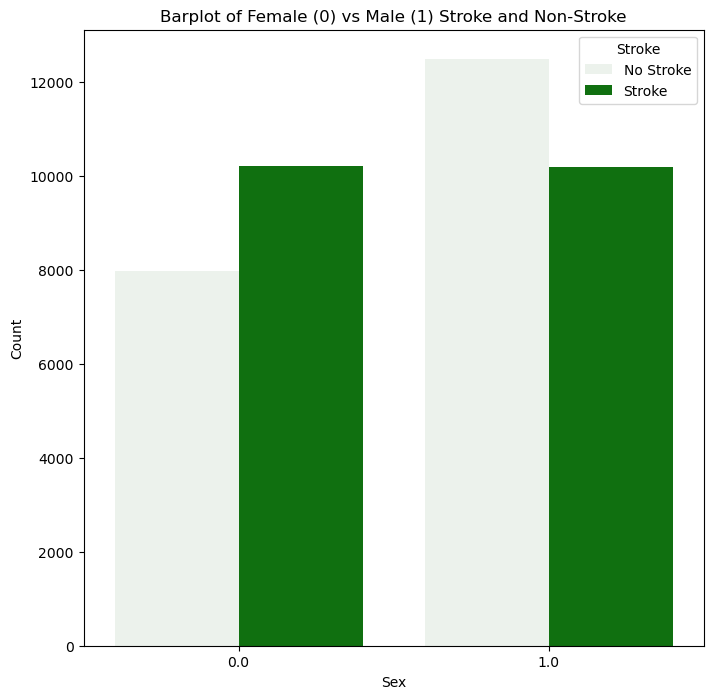

In [8]:
plt.figure(figsize=(8,8))
sb.countplot(data=traindata,x='sex', hue='stroke', color="green")
plt.title("Barplot of Female (0) vs Male (1) Stroke and Non-Stroke")
plt.ylabel('Count')
plt.xlabel('Sex')
plt.legend(title='Stroke', labels = ['No Stroke','Stroke'])

By plotting the barplot of gender and stroke, we can notice that there is a greater proportion of Females with Stroke(7967:10215) compared to Males with Stroke(12480:10187). Therefore, there might be a correlation between `sex` and `stroke`.

## 2.2 Exploring relationship between 'age' and 'stroke' 

In [12]:
traindata['age'].describe()

count    40849.000000
mean        51.404074
std         21.543166
min          0.000000
25%         35.000000
50%         52.000000
75%         68.000000
max        103.000000
Name: age, dtype: float64

Text(0.5, 9.444444444444438, 'Age')

<Figure size 800x800 with 0 Axes>

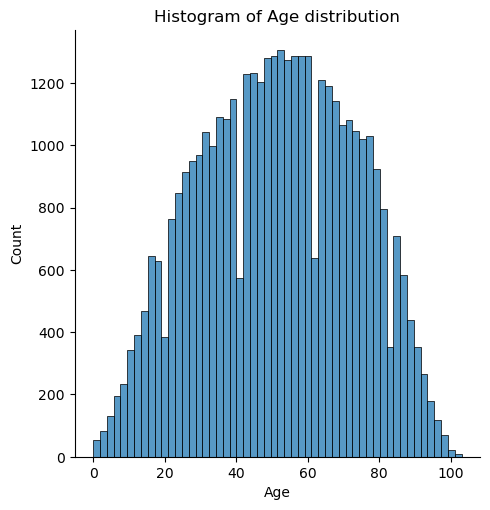

In [13]:
plt.figure(figsize=(8,8))
sb.displot(traindata['age'])
plt.title("Histogram of Age distribution")
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Stroke')

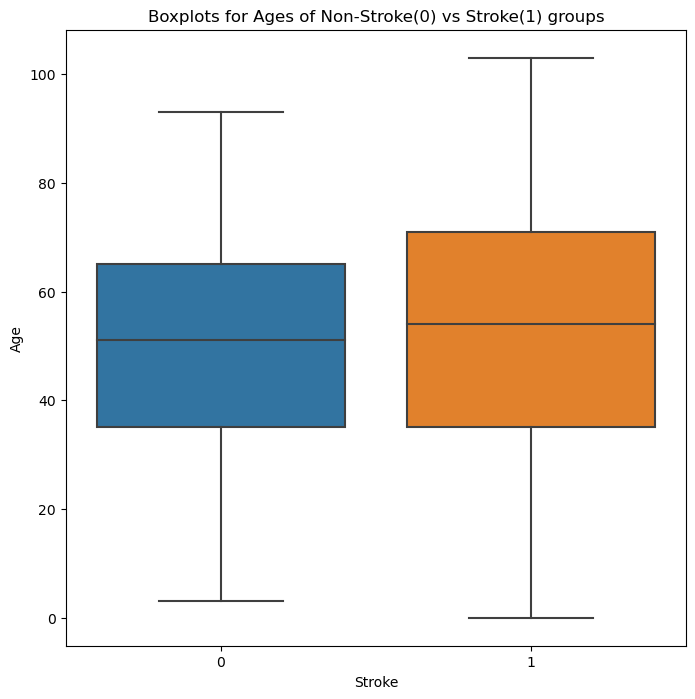

In [16]:
plt.figure(figsize=(8,8))
sb.boxplot(data=traindata,x='stroke',y='age')
plt.title("Boxplots for Ages of Non-Stroke(0) vs Stroke(1) groups")

plt.ylabel('Age')
plt.xlabel('Stroke')

From the boxplots of age between non-stroke(0) vs stroke(1):

It can be seen that the median age of stroke patients is greater than the median age of non-stroke patients. People aged > 60 years tend to have stroke. This could be mean stroke is a aged-related illness, on top of being an illness affected by lifestyle habits. and that there is correlation between `age` and `stroke`

Another observation is that there are also people age >60 years who do not have stroke.


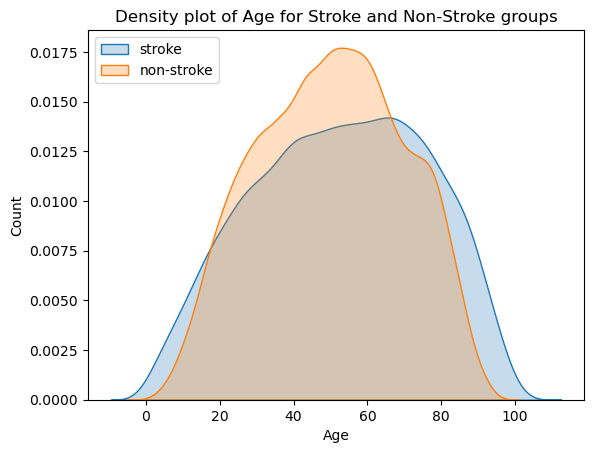

In [15]:
# create two separate dataframes for stroke and non-stroke groups
stroke_data = traindata[traindata['stroke'] == 1]
non_stroke_data = traindata[traindata['stroke'] == 0]

# plot overlapping density plots for the age variable
sb.kdeplot(stroke_data['age'], label='stroke', shade=True)
sb.kdeplot(non_stroke_data['age'], label='non-stroke', shade=True)

# set the plot title and axis labels
plt.title('Density plot of Age for Stroke and Non-Stroke groups')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend(loc = 'upper left')
# show the plot
plt.show()

Above is a density plot of non-stroke(orange) vs stroke(blue) groups to visualise relationship of age and incidents of stroke. 
It can be seen that the width of the curve for Stroke(blue) is wider, indicating that there is a greater spread in ages of those who suffer from stroke.
Also, median age of stroke group is larger than that of non-stroke, as the peak of the curve for stroke lies on the right of the curve for non-stroke. 

## 2.3 Exploring relationship between 'hypertension' and 'stroke'

In [18]:
hypertension_stroke_counts = traindata.groupby(['hypertension', 'stroke']).size()
print(hypertension_stroke_counts)


hypertension  stroke
0             0         18231
              1         13893
1             0          2216
              1          6509
dtype: int64


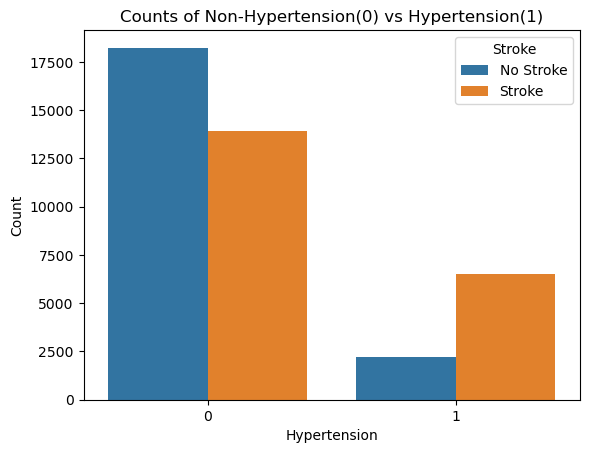

In [17]:
#Create a bar plot of hypertension vs non-hypertension
sb.countplot(x='hypertension', data=traindata, hue='stroke')
plt.title("Counts of Non-Hypertension(0) vs Hypertension(1)")
plt.ylabel('Count')
plt.xlabel('Hypertension')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')

#Show the plot
plt.show()

From this, we can infer that `Hypertension` has a strong correlation with `stroke`. From the countplot above, the proportion of stroke to non-stroke is larger (6509:2216) in the case when they have hypertension(right) compared to the case when they do not have hypertension(left) (13893:18231). This could mean that if the person suffers from hypertension, then it is likelier that suffers from Stroke.

## 2.4 Exploring relationship between 'heart_disease' and 'stroke' 

In [30]:
heartdisease_stroke_counts = traindata.groupby(['heart_disease', 'stroke']).size()
print(heartdisease_stroke_counts)

heart_disease  stroke
0              0         19364
               1         16269
1              0          1083
               1          4133
dtype: int64


Text(0.5, 0, 'heart_disease')

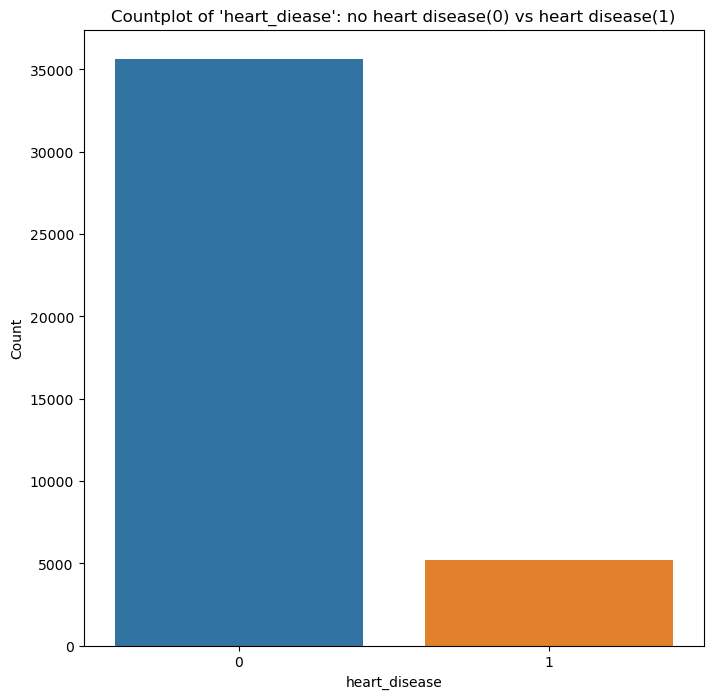

In [27]:
plt.figure(figsize=(8,8))
sb.countplot(data=traindata,x='heart_disease')
plt.title("Countplot of 'heart_diease': no heart disease(0) vs heart disease(1)")
plt.ylabel('Count')
plt.xlabel('heart_disease')


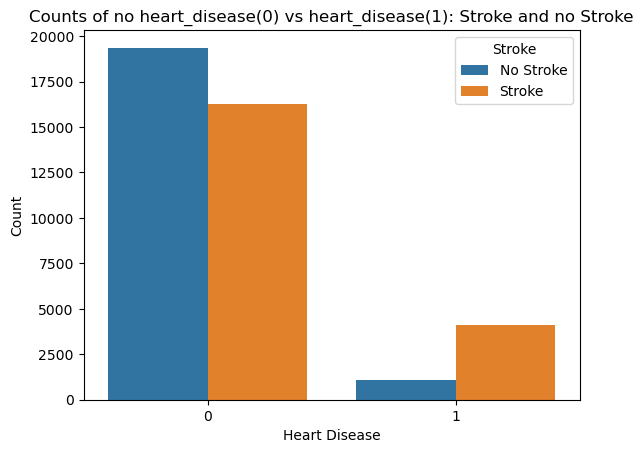

In [32]:
#Create a bar plot of hypertension vs non-hypertension
sb.countplot(x='heart_disease', data=traindata, hue='stroke')
plt.title("Counts of no heart_disease(0) vs heart_disease(1): Stroke and no Stroke")
plt.ylabel('Count')
plt.xlabel('Heart Disease')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')

#Show the plot
plt.show()

From our countplot, we can infer that `heart_disease` has correlation with `Stroke`. The proportion of stroke patients to non-stroke patients is larger(4133:1083) in the case when they have heart_disease(right) compared to the case when they do not have heart_disease(left)(16269:19364). This means that a perosn with heart disease is likelier to suffer from Stroke as well.

## 2.5 Exploring relationship between 'ever_married' and 'stroke'

In [33]:
traindata['ever_married'].describe()

count    40849.000000
mean         0.821293
std          0.383111
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: ever_married, dtype: float64

<AxesSubplot:title={'center':'Countplot of single (0) vs married (1)'}, xlabel='ever_married', ylabel='count'>

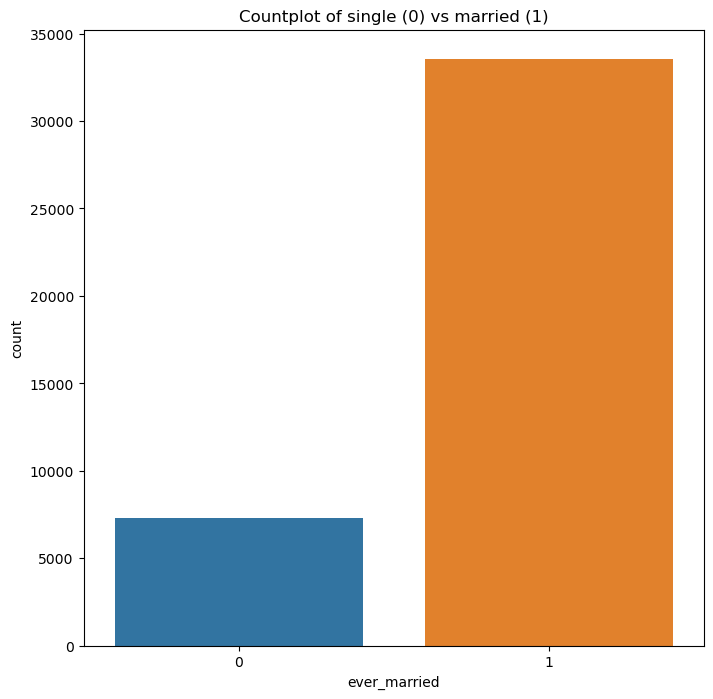

In [35]:
plt.figure(figsize=(8,8))

plt.title("Countplot of single (0) vs married (1)")
plt.ylabel('Count')
plt.xlabel('ever_married')

sb.countplot(data=traindata,x='ever_married')

In [37]:
married_stroke_counts = traindata.groupby(['ever_married', 'stroke']).size()
print(married_stroke_counts)

ever_married  stroke
0             0          5077
              1          2223
1             0         15370
              1         18179
dtype: int64


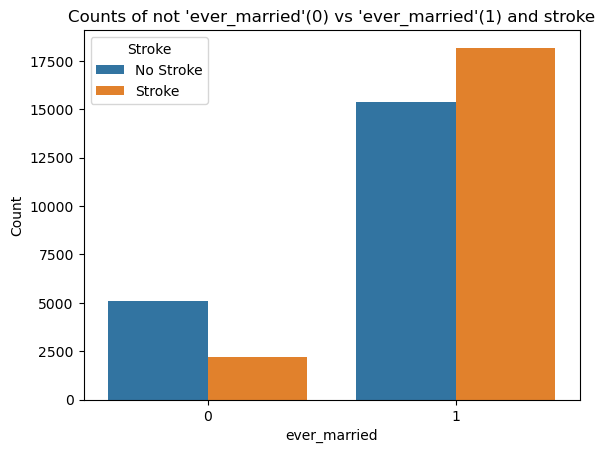

In [53]:
sb.countplot(data=traindata,x='ever_married',hue='stroke')
plt.title("Counts of not 'ever_married'(0) vs 'ever_married'(1) and stroke")
plt.ylabel('Count')
plt.xlabel('ever_married')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper left')

#Show the plot
plt.show()

From our countplot, we can see that there is correlation between `ever_married` and `stroke`. The proportion of stroke patients to non-stroke patients is larger(18179:15370) in the case when they have been married(right) compared to the case when they have not been married(left)(2223:5077).

However, despite the pattern we can observe here. Marriage could maybe be not the main reason for stroke. It could be the case that those who are married are generally older and with age, their chances of having stroke will increase. Therefore, it may not be right to assume that the variables are independent of one another.

## 2.6 Exploring relationship between 'avg_glucose_level' and 'stroke'

In [38]:
traindata['avg_glucose_level'].describe()

count    40849.000000
mean       122.070963
std         57.555158
min         55.120000
25%         78.750000
50%         97.950000
75%        167.410000
max        271.740000
Name: avg_glucose_level, dtype: float64

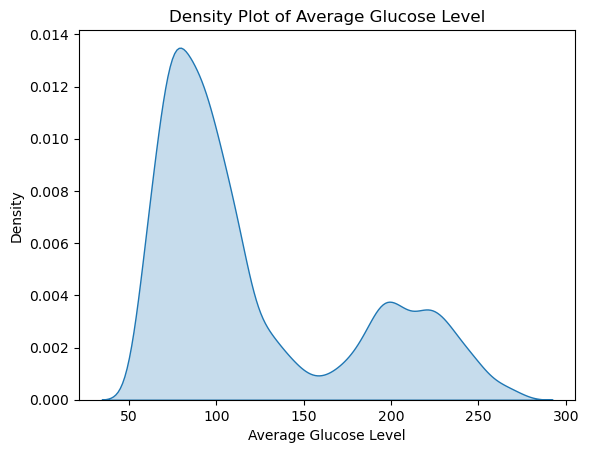

In [39]:
sb.kdeplot(traindata['avg_glucose_level'], shade=True)
plt.title('Density Plot of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

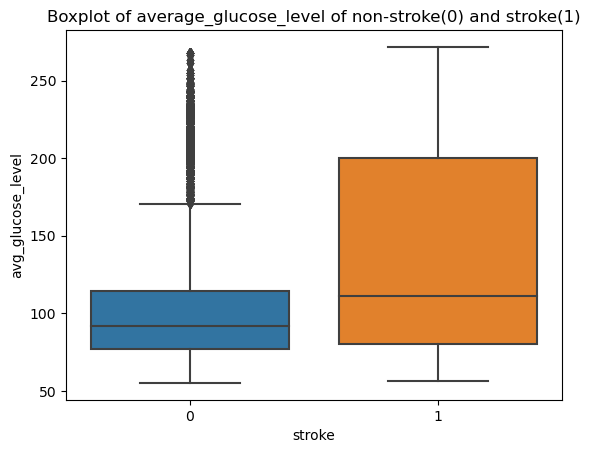

In [42]:
plt.title('Boxplot of average_glucose_level of non-stroke(0) and stroke(1)')
plt.ylabel('average_glucose_level')
plt.xlabel('stroke')

sb.boxplot(data=traindata,x='stroke',y='avg_glucose_level')
plt.show()

In [41]:
stroke_summary = traindata.groupby('stroke')['avg_glucose_level'].agg(['mean', 'median', 'std'])
print(stroke_summary)

              mean  median        std
stroke                               
0       106.797871   91.90  46.239040
1       137.377742  110.85  63.417619


From the boxplot and stroke_summary above, we can see that the median average glucose level of stroke group is >100 and more than the median average glucose level than those who do not have stroke. Therefore, there is a correlation between `average_glucose_level` and `stroke`.

## 2.7 Exploring relationship between 'bmi' and 'stroke'

In [43]:
traindata['bmi'].describe()

count    40849.000000
mean        30.405795
std          6.835516
min         11.500000
25%         25.900000
50%         29.400000
75%         34.100000
max         92.000000
Name: bmi, dtype: float64

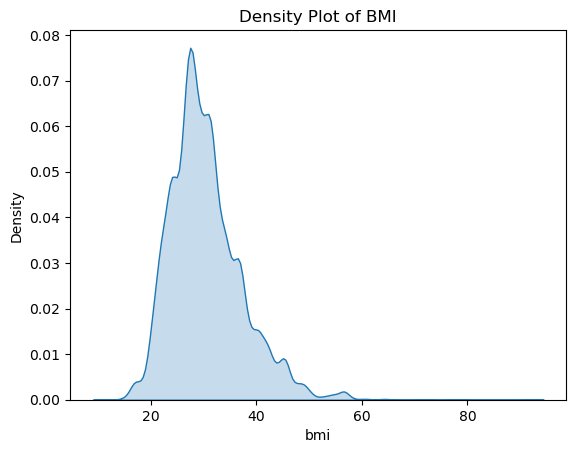

In [44]:
sb.kdeplot(traindata['bmi'], shade=True)
plt.title('Density Plot of BMI')
plt.xlabel('bmi')
plt.ylabel('Density')
plt.show()

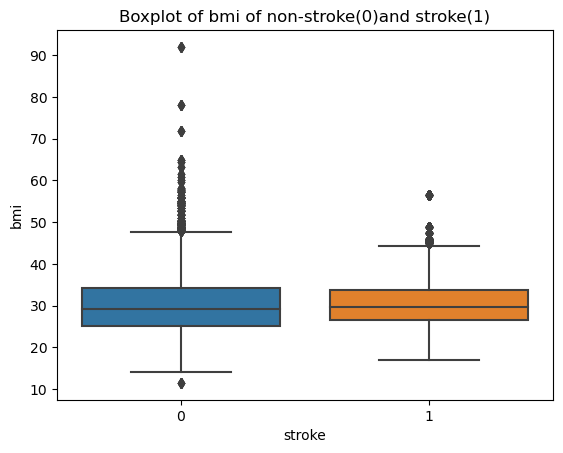

In [47]:
plt.title('Boxplot of bmi of non-stroke(0)and stroke(1)')
plt.ylabel('bmi')
plt.xlabel('stroke')

sb.boxplot(data=traindata,x='stroke',y='bmi')
plt.show()

In [48]:
bmi_summary = traindata.groupby('stroke')['bmi'].agg(['mean', 'median', 'std'])
print(bmi_summary)

             mean  median       std
stroke                             
0       30.281313    29.1  7.334007
1       30.530551    29.7  6.294166


From the boxplot of bmi of non-stroke and stroke groups, there is no clear correlation between `bmi` and `stroke`.

Another thing to note is that the there are a lot of outliers with high bmi in the non-stroke group.

## 2.8 Exploring relationship between 'smoking_status' and 'stroke' 

In [49]:
traindata['smoking_status'].describe()

count    40849.000000
mean         0.488702
std          0.499878
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: smoking_status, dtype: float64

Text(0.5, 0, 'smoking_status')

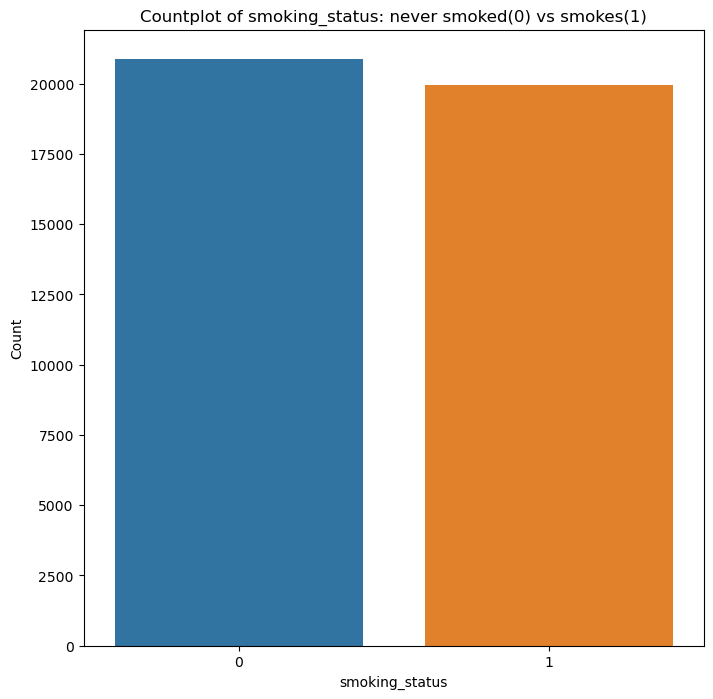

In [52]:
plt.figure(figsize=(8,8))
sb.countplot(data=traindata,x='smoking_status')
plt.title("Countplot of smoking_status: never smoked(0) vs smokes(1)")
plt.ylabel('Count')
plt.xlabel('smoking_status')

In [56]:
smoking_stroke_counts = traindata.groupby(['smoking_status', 'stroke']).size()
print(smoking_stroke_counts)

smoking_status  stroke
0               0         11157
                1          9729
1               0          9290
                1         10673
dtype: int64


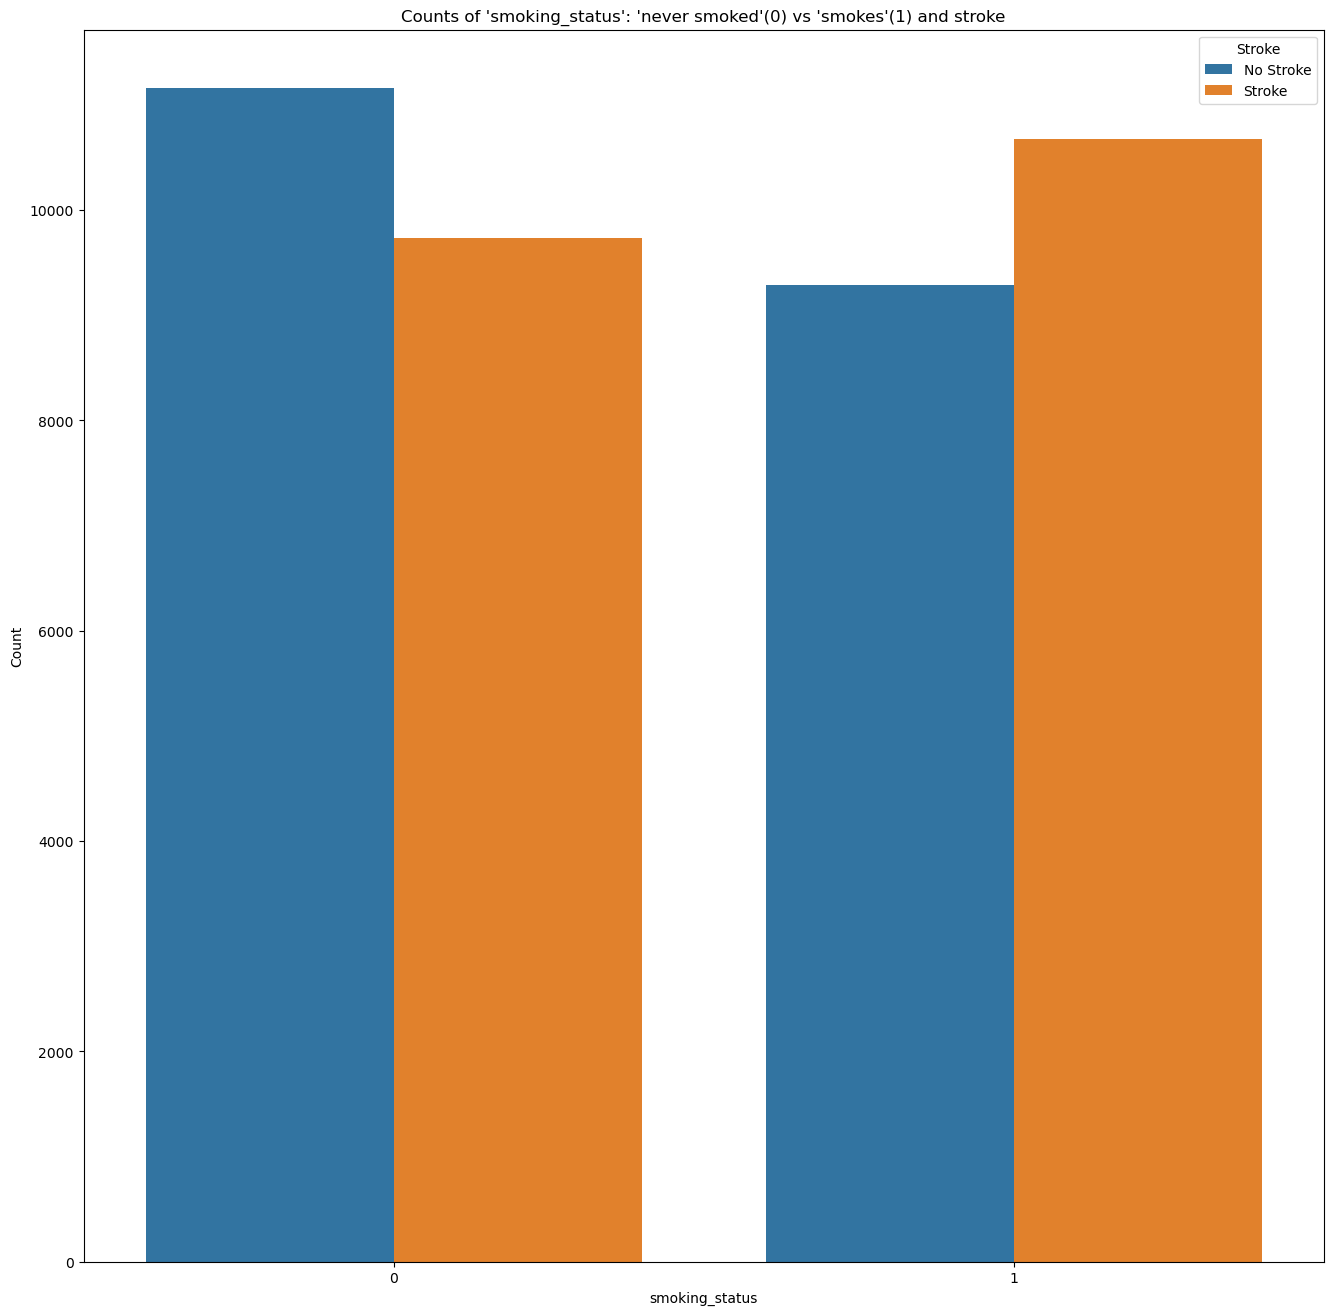

In [55]:
plt.figure(figsize=(16,16))
sb.countplot(data=traindata,x='smoking_status',hue='stroke')
plt.title("Counts of 'smoking_status': 'never smoked'(0) vs 'smokes'(1) and stroke")
plt.ylabel('Count')
plt.xlabel('smoking_status')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')

#Show the plot
plt.show()

From the above countplot, we can infer that there is slight correlation between `smoking_status` and `stroke`. As the proportion of smokers that have stroke vs that of non stroke is higher(10673:9290) than that of the group that does not smoke(0)(11157:9729).

This indicates that a person who smokes is likelier to suffer from stroke than a non-smoker.

## 2.9 Correlation between each factor and 'stroke'

### Step 1: Separate numerical data and categorical data into 2 dataframes 

In [57]:
categorical_factors = traindata[["sex", "hypertension", "heart_disease", "ever_married", "smoking_status"]]
numerical_factors = traindata[["age", "avg_glucose_level", "bmi"]]
stroke = traindata["stroke"]

### Step 2: Correlation between numerical factors and 'stroke' 

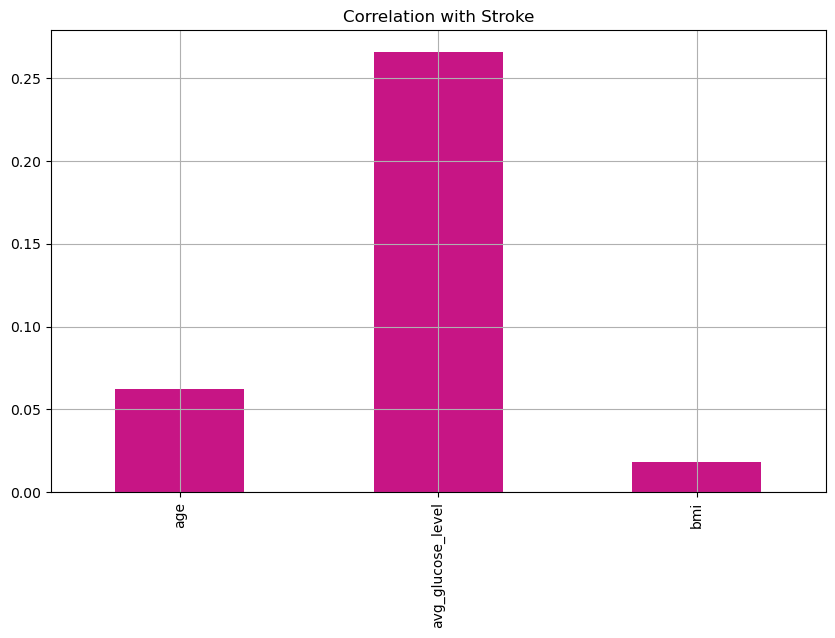

In [58]:
numerical_factors.corrwith(traindata.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="mediumvioletred");

From the above, graph, we can see that among the numerical variables, `avg_glucose_level` is most correlated to Stroke, followed by `age` and `bmi`.

### Step 3: Correlation between categorical factors and 'stroke' using chi-squared test 

In [62]:
from scipy.stats import chi2_contingency

#Perform chi-square test for each of the categorical variable 
for col in categorical_factors.columns:
    observed = pd.crosstab(categorical_factors[col], stroke)
    chi2, p, dof, expected = chi2_contingency(observed)
    print(col)
    print('Chi-square test statistic:', chi2)
    print('p-value:', p)
    print('Degrees of freedom:', dof)
    print('Expected values:', expected)
    print()

sex
Chi-square test statistic: 509.4020022964851
p-value: 8.557009032081618e-113
Degrees of freedom: 1
Expected values: [[ 9101.01481064  9080.98518936]
 [11345.98518936 11321.01481064]]

hypertension
Chi-square test statistic: 2696.803458187549
p-value: 0.0
Degrees of freedom: 1
Expected values: [[16079.6941908 16044.3058092]
 [ 4367.3058092  4357.6941908]]

heart_disease
Chi-square test statistic: 2050.8892412081786
p-value: 0.0
Degrees of freedom: 1
Expected values: [[17836.12697985 17796.87302015]
 [ 2610.87302015  2605.12697985]]

ever_married
Chi-square test statistic: 1349.9923032584466
p-value: 1.5464979508529996e-295
Degrees of freedom: 1
Expected values: [[ 3654.02090626  3645.97909374]
 [16792.97909374 16756.02090626]]

smoking_status
Chi-square test statistic: 193.1211757373082
p-value: 6.623296664552006e-44
Degrees of freedom: 1
Expected values: [[10454.50419839 10431.49580161]
 [ 9992.49580161  9970.50419839]]



As we cannot employ the Pearson Correlation for non-numerical variables, we used chi-squared test to determine whether there is a significant association between two categorical variables. It compares the observed data with the expected data to determine whether the differences between the two are due to chance or to a real relationship between the variables.

We then compare the calculated chi-square value to a critical value from the chi-square distribution table with a given degree of freedom (df). The degree of freedom is calculated as (number of rows - 1) x (number of columns - 1). If the calculated chi-square value is greater than the critical value, we reject the null hypothesis and conclude that there is a significant association between the variables.

A higher chi-square test statistic value means that the observed data differs more from the expected data, indicating a stronger association between the two categorical variables. In other words, it suggests that the observed differences are less likely to be due to chance and more likely to be due to a real relationship between the variables. 

Therefore, from the results of our chi-square test, we conclude that the variables that are highly associated with stroke are(in decreasing order of association): `hypertension`, `heart_disease`, `ever_married`, `sex`, `smoking_status`